## Part 1: Data Loading and Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd

data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(f"Dataset shape (rows, columns): {data.shape}")
data.info()

Dataset shape (rows, columns): (1338, 7)
<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Part 2: Data Cleaning

### Check for Missing Values

In [5]:
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Check for Duplicate Rows

In [6]:
print(f"Number of duplicate rows found: {data.duplicated().sum()}")
initial_rows = data.shape[0]
if data.duplicated().sum() > 0:
    data.drop_duplicates(inplace=True)
    print(f"Duplicate rows removed. New dataset shape: {data.shape}")
else:
    print("No duplicate rows found.")

Number of duplicate rows found: 1
Duplicate rows removed. New dataset shape: (1337, 7)


### Confirm Data Types

In [7]:
data.info()

<class 'pandas.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   str    
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   str    
 5   region    1337 non-null   str    
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 83.6 KB


# Part 3: Exploratory Data Analysis

### Generate Visualizations

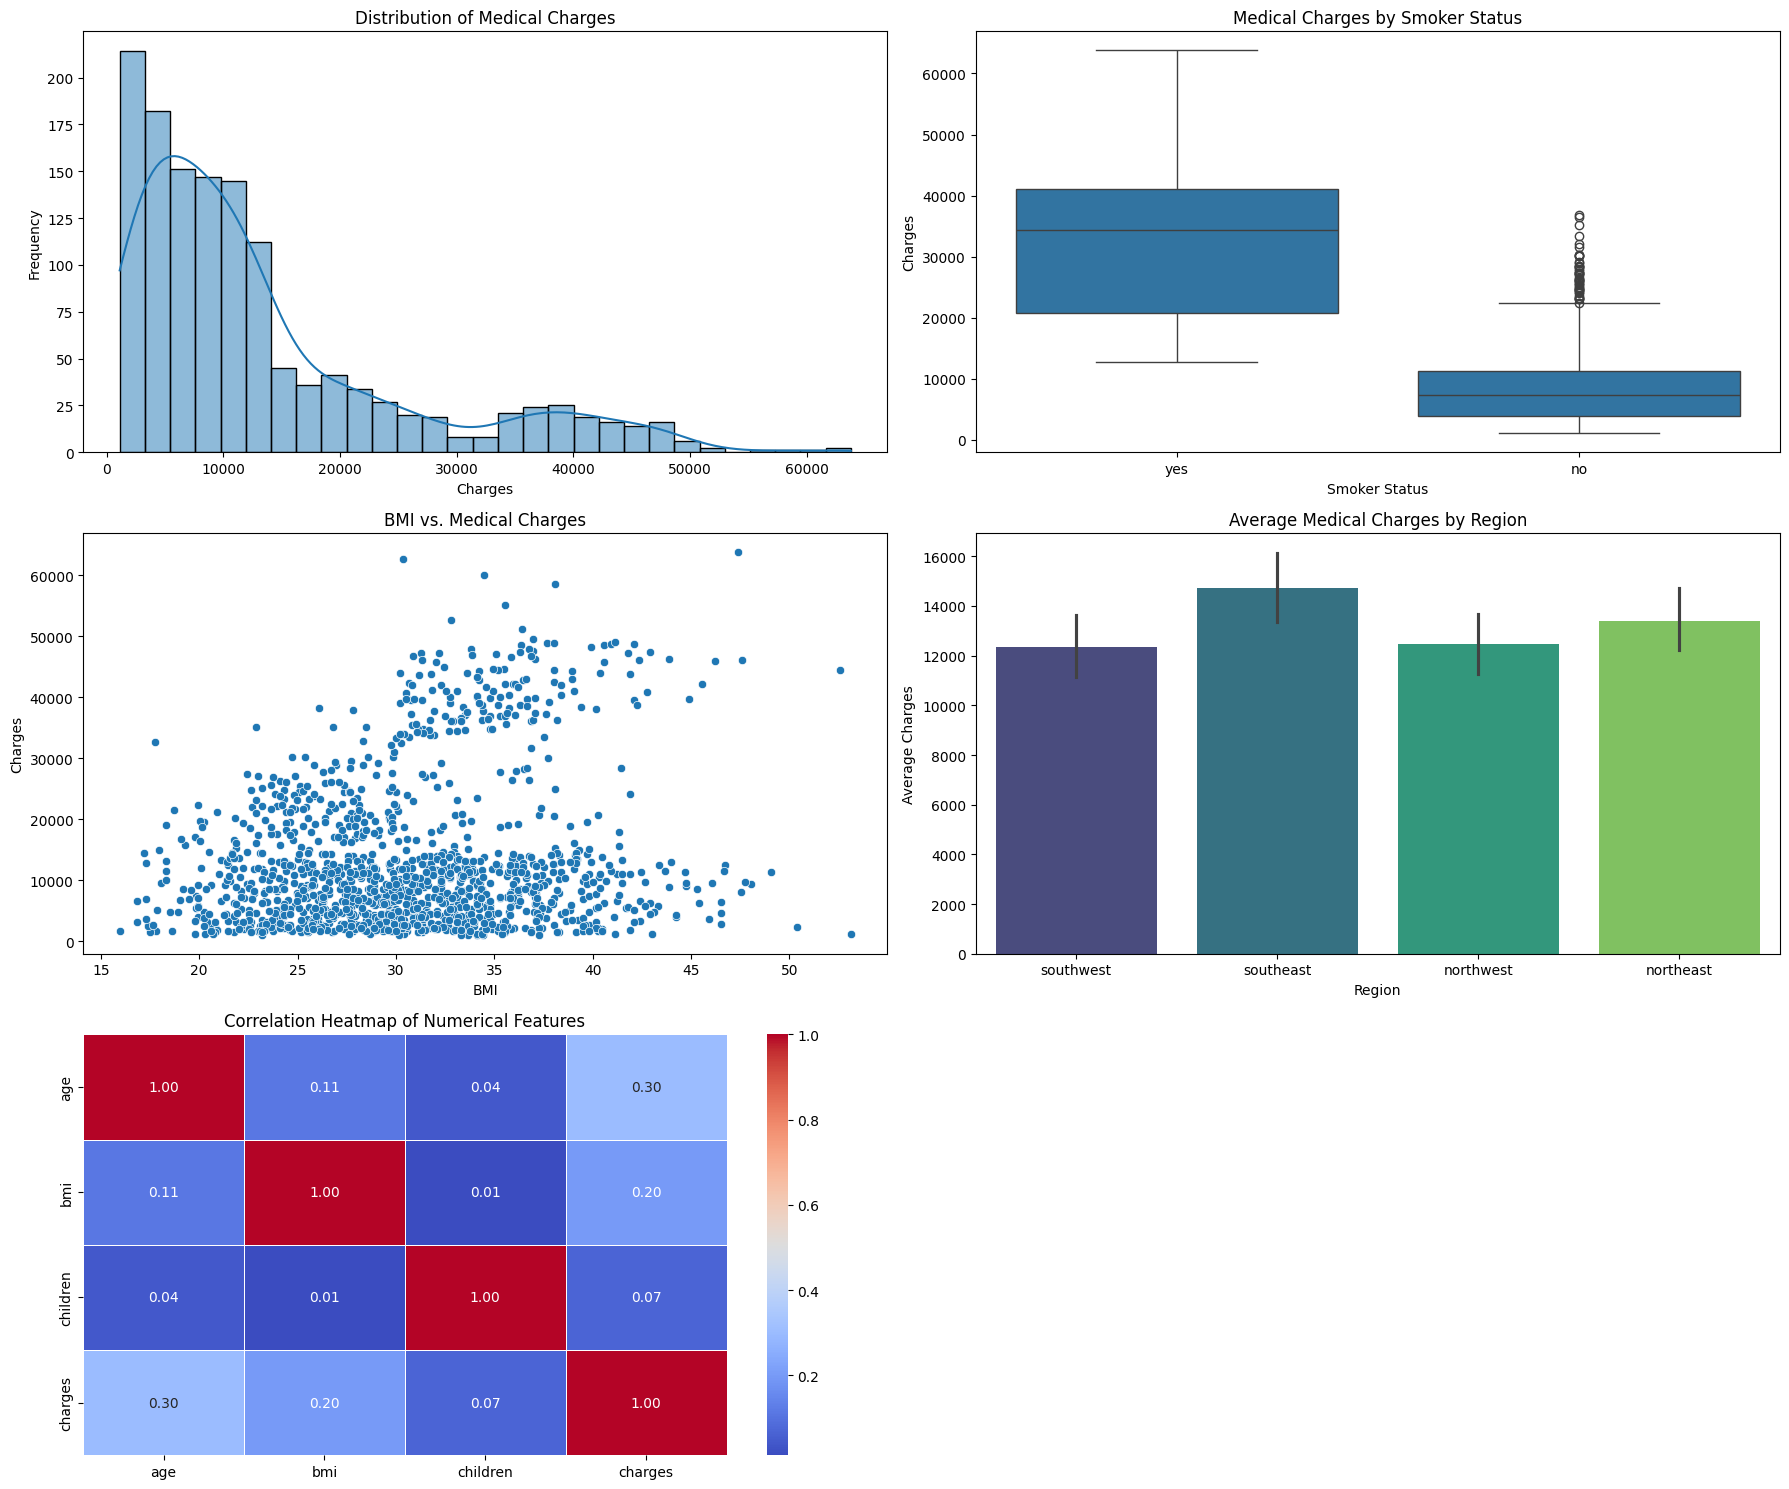

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))

# 1. Histogram of 'charges'
sns.histplot(data=data, x='charges', kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Medical Charges')
axs[0, 0].set_xlabel('Charges')
axs[0, 0].set_ylabel('Frequency')

# 2. Boxplot of 'charges' by 'smoker'
sns.boxplot(data=data, x='smoker', y='charges', ax=axs[0, 1])
axs[0, 1].set_title('Medical Charges by Smoker Status')
axs[0, 1].set_xlabel('Smoker Status')
axs[0, 1].set_ylabel('Charges')

# 3. Scatterplot of 'bmi' vs 'charges'
sns.scatterplot(data=data, x='bmi', y='charges', ax=axs[1, 0])
axs[1, 0].set_title('BMI vs. Medical Charges')
axs[1, 0].set_xlabel('BMI')
axs[1, 0].set_ylabel('Charges')

# 4. Barplot of average 'charges' by 'region'
sns.barplot(data=data, x='region', y='charges', estimator=np.mean, ax=axs[1, 1], palette='viridis', hue='region', legend=False)
axs[1, 1].set_title('Average Medical Charges by Region')
axs[1, 1].set_xlabel('Region')
axs[1, 1].set_ylabel('Average Charges')

# 5. Correlation Heatmap
numerical_cols = data.select_dtypes(include=np.number)
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axs[2, 0])
axs[2, 0].set_title('Correlation Heatmap of Numerical Features')

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

## Interpretation of Visualizations:

Do smokers pay more? Yes, smokers generally pay significantly more in medical charges than non-smokers, as evidenced by the boxplot showing a much higher median charge and wider spread for smokers.

Does BMI affect charges? 
Yes, there appears to be a positive correlation between BMI and medical charges. Higher BMI generally correlates with higher charges, particularly among smokers and at the higher end of the BMI spectrum.

Which region has the highest average cost?

Observation from 'Average Medical Charges by Region' barplot: The barplot shows that the Southeast region has the highest average medical charges compared to the other regions (Southwest, Northwest, Northeast).
Answer: The Southeast region has the highest average medical cost

# Part 4: Categorical Encoding

In [9]:
## Convert the categorical variables ('sex', 'smoker', 'region') into numerical format using pd.get_dummies()


data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
print("DataFrame after one-hot encoding:")
display(data_encoded.head())
print(f"New dataset shape: {data_encoded.shape}")

DataFrame after one-hot encoding:


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


New dataset shape: (1337, 9)


# Part 5: Simple Linear Regression

In [10]:
### Prepare Data for Modeling

X = data_encoded[['bmi']].values.reshape(-1, 1)
y = data_encoded['charges'].values

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Shape of X (features): (1337, 1)
Shape of y (target): (1337,)


### Interpret Model and Plot Regression Line

Coefficient (slope) for BMI: 393.86
Intercept: 1202.14
R-squared: 0.04
P-value for BMI coefficient: 0.000


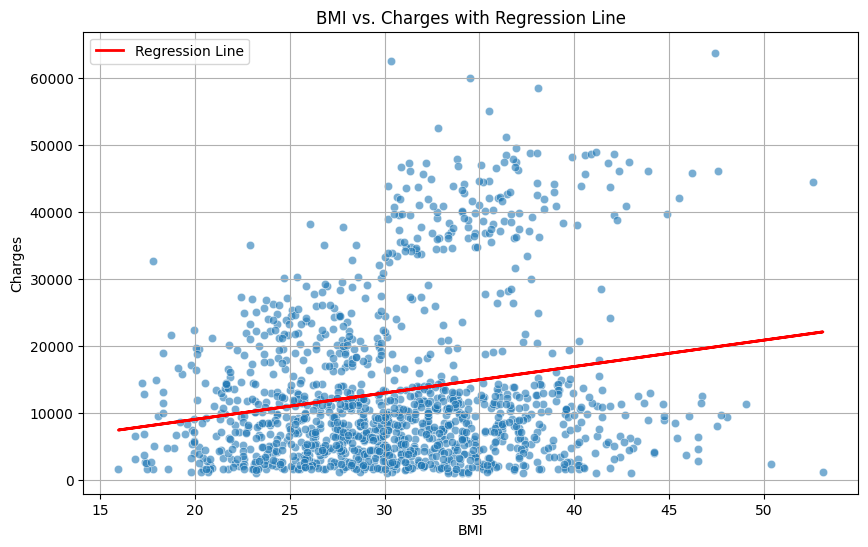

In [11]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare variables
X = data[['bmi']]
y = data['charges']

# Fit sklearn model
model = LinearRegression()
model.fit(X, y)

# Coefficient + intercept
coefficient = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"Coefficient (slope) for BMI: {coefficient:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_squared:.2f}")

# Statsmodels for p-value
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

# FIXED: get p-value by column name
p_value = model_sm.pvalues['bmi']

print(f"P-value for BMI coefficient: {p_value:.3f}")

# Scatter + regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['bmi'], y=y, alpha=0.6)
plt.plot(X['bmi'], model.predict(X), color='red', linewidth=2, label='Regression Line')

plt.title('BMI vs. Charges with Regression Line')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

# Prepare Data for Modeling
X = data_encoded[['bmi']].values.reshape(-1, 1)
y = data_encoded['charges'].values

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


# Part 6: Multiple Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

# --- Prepare Data and Train Simple Linear Regression Model (BMI vs. Charges) ---
X = data_encoded[['bmi']].values.reshape(-1, 1)
y = data_encoded['charges'].values
model = LinearRegression()
model.fit(X, y)
r_squared = model.score(X, y)

# --- Prepare Data and Train Multiple Linear Regression Model ---
features = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
X_multi = data_encoded[features]
y_multi = data_encoded['charges']
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)
r_squared_multi = model_multi.score(X_multi, y_multi)

print("--- Simple Linear Regression Model (BMI vs. Charges) ---")
print(f"Coefficient (BMI): {model.coef_[0]:.2f}")
print(f"R-squared: {r_squared:.3f}")

print("\n--- Multiple Linear Regression Model ---")
print("Coefficients:")
for feature, coef in zip(features, model_multi.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"R-squared: {r_squared_multi:.3f}")

print("\n--- Performance Comparison ---")
if r_squared_multi > r_squared:
    print(f"The Multiple Linear Regression Model (R-squared: {r_squared_multi:.3f}) performs better than the Simple Linear Regression Model (R-squared: {r_squared:.3f}).")
else:
    print(f"The Simple Linear Regression Model (R-squared: {r_squared:.3f}) performs better than or equal to the Multiple Linear Regression Model (R-squared: {r_squared_multi:.3f}).")

--- Simple Linear Regression Model (BMI vs. Charges) ---
Coefficient (BMI): 393.86
R-squared: 0.039

--- Multiple Linear Regression Model ---
Coefficients:
  age: 256.76
  bmi: 339.25
  children: 474.82
  sex_male: -129.48
  smoker_yes: 23847.33
  region_northwest: -349.23
  region_southeast: -1035.27
  region_southwest: -960.08
R-squared: 0.751

--- Performance Comparison ---
The Multiple Linear Regression Model (R-squared: 0.751) performs better than the Simple Linear Regression Model (R-squared: 0.039).


# Final Report: Analysis of Insurance Charges

1. Does smoking significantly increase insurance charges?
Yes, smoking significantly increases insurance charges. Both the boxplot visualization ('Medical Charges by Smoker Status') and the multiple linear regression model's coefficients strongly support this. Smokers consistently face much higher medical costs, with the smoker_yes coefficient in the multiple regression model being the largest positive predictor (approximately +$23,847), indicating a substantial additional charge for smokers compared to non-smokers, all other factors being equal.

2. Which factor affects charges the most?
Smoking status (smoker_yes) is the factor that affects charges the most. The coefficient for smoker_yes in the multiple linear regression model (approximately +$23,847) is far greater than that of any other feature, indicating its dominant influence on insurance charges. Other factors like age and BMI also have a positive impact, but their magnitudes are considerably smaller.

3. Was multiple regression better than simple regression?
Yes, multiple regression was significantly better than simple regression.

The simple linear regression model (using only BMI to predict charges) had an R-squared of 0.039, meaning it explained only about 3.9% of the variance in insurance charges.
The multiple linear regression model (incorporating age, BMI, children, sex, and region) achieved an R-squared of 0.751, explaining over 75% of the variance in charges. This represents a substantial improvement in predictive power, demonstrating that insurance charges are influenced by a combination of factors, not just BMI.

4. What limitations exist in your model?
Several limitations exist in the current model:
Linearity Assumption: The model assumes a linear relationship between features and charges. While linear regression provides a good baseline, some relationships might be non-linear (e.g., the effect of age or BMI might accelerate at certain points), which a simple linear model might not capture.
Residual Analysis: We have not thoroughly checked the model's assumptions regarding the residuals (e.g., normality, homoscedasticity, independence). Violations of these assumptions could impact the reliability of the model's coefficients and p-values.
Outliers: While some outliers were visible in the boxplots (especially for smokers), their specific impact on the regression model was not explicitly analyzed or handled. Outliers can heavily influence linear regression results.
Feature Interactions: The current model does not explicitly account for interaction effects between features (e.g., the combined effect of BMI and smoking might be more than the sum of their individual effects). Incorporating interaction terms could potentially improve the model.
Model Validation: While we evaluated the R-squared on the training data, a proper model evaluation would typically involve splitting the data into training and testing sets to assess its performance on unseen data and prevent overfitting.
Causality: The model identifies correlations and predictive relationships, but it does not definitively establish causation (e.g., while smoking is strongly correlated with higher charges, the model doesn't explain all the underlying causal mechanisms).